# AI 3601 Homework 1 
## Due: 23:59:59 (GMT +08:00), March 27, 2025 ##

# Section 1. Convergence of Policy Iteration

Given an MDP with finite state space $S$, finite actions space $A$, and rewards $R(s,a,s')$. We first define the $V$-value function and $Q$-value function with reward function corresponding to state $s$, action $a$ and next state $s'$. Specifically, the $V$-value function of policy $\pi$ at state $s$ is defined as
$$
V^{\pi}(s)=\mathbb{E}\left[ \sum_{t=0}^\infty \gamma^t R(s_t,a_t, s'_t) \mid \pi,s_0=s \right],
$$

and the $Q$-value of policy $\pi$ at state $s$ and action $a$ is defined as
$$
Q^{\pi}(s,a) = \mathbb{E}\left[ \sum_{t=0}^\infty \gamma^t R(s_t,a_t, s'_t) \mid \pi,s_0=s,a_0=a \right].
$$

Corresponding to the above $V$-value and $Q$-value function, recall that the policy iteration algorithm is equivalent to
- **Policy Evaluation**: For fixed current policy $\pi_i$, compute the $V$-values by iterating until values converge:
    $$
    V_{k+1}^{\pi_i} \leftarrow \sum_{s'} P(s,\pi_i(s),s')[R(s,\pi_i(s),s')+\gamma V_k^{\pi_i}(s')],
    $$
    where $k$ denotes the iterating step when computing the values.
- **Policy Improvement**: For fixed values, get a better policy using policy extraction:
    $$
    \pi_{i+1}(s) \in \arg\max_a \sum_{s'} P(s,a,s')[R(s,a,s')+\gamma V^{\pi_i}(s')],
    $$
    which is equivalent to $\pi_{i+1}(s) \in \arg\max_a Q^{\pi_i}(s,a)$.

**Question 1.** Prove that a policy improvement step will always produce a new policy at least as good as the original one ($V^{\pi_{i+1}}(s) \geq V^{\pi_{i}}(s)$ for any state $s$), and prove that policy iteration converges to an optimal policy. You can directly provide your answer below using Markdown, or write it by hand and submit an additional PDF file in Canvas.

# Solution

----

Let $\pi_i$ be the current policy and $\pi_{i+1}$ be the policy after policy improvement. Since $\pi_i$ may not be the optimal policy, we have
$$
V^{\pi_i}(s)=Q^{\pi_i}(s, \pi_i(s))\le \max_a Q^{\pi_i}(s,a).
$$
Expand $\max_a Q^{\pi_i}(s,a)$, we have
$$
\max_a Q^{\pi_i}(s,a) = \max_a \sum_{s'}T(s,a,s')[R(s,a,s')+\gamma V^{\pi_i}(s')]=\max_a R(s,a) + \gamma \sum_{s'}T(s,a,s')V^{\pi_i}(s').
$$
By the definition of $\pi_{i+1}$, the above expression is equal to
$$
R(s,\pi_{i+1}(s)) + \gamma \sum_{s'}T(s,\pi_{i+1}(s),s')V^{\pi_i}(s').
$$
As mentioned above, $\pi_i$ may not be the optimal policy, we have
$$
\begin{align*}
R(s,\pi_{i+1}(s)) + \gamma \sum_{s'}T(s,\pi_{i+1}(s),s')V^{\pi_i}(s') &\le R(s,\pi_{i+1}(s)) + \gamma \sum_{s'}T(s,\pi_{i+1}(s),s')(\max_{a'}Q^{\pi_i}(s',a'))\\
&= R(s,\pi_{i+1}(s)) + \gamma \sum_{s'}T(s,\pi_{i+1}(s),s')(R(s', \pi_{i+1}(s'))+\gamma \sum_{s''}T(s',\pi_{i+1}(s'),s'')V^{\pi_i}(s'')).
\end{align*}
$$
Then, repeat expanding $V^{\pi_i}(s'')$ to a value $\le \max_{a''}Q^{\pi_i}(s'',a'')$. Finally, we have
$$
R(s,\pi_{i+1}(s)) + \gamma \sum_{s'}T(s,\pi_{i+1}(s),s')(R(s', \pi_{i+1}(s'))+\gamma \sum_{s''}T(s',\pi_{i+1}(s'),s'')(...)) = V^{\pi_{i+1}}(s),
$$
which proves that $V^{\pi_i}(s)\le V^{\pi_{i+1}}(s)$.

----

Define the Bellman operator $B$ as follows
$$
BV(s)=\max_a \sum_{s'}T(s,a,s')[R(s,a,s')+\gamma V(s')].
$$
Let $\parallel V(s)-V'(s)\parallel_{\infty} = \max_s \left|V(s)-V'(s)\right|$ be the infinity norm. We prove the convergence by proving that $B$ is a Contraction on $V$ for $0<\gamma <1$. First, we have
$$
\begin{align*}
\parallel BV(s)-BV'(s)\parallel_{\infty}&=\max_s \left|\max_a \sum_{s'}T(s,a,s')[R(s,a,s')+\gamma V(s')] - \max_a \sum_{s'}T(s,a,s')[R(s,a,s')+\gamma V'(s')]\right|\\
&\le \max_s \max_a \left|\sum_{s'}T(s,a,s')[R(s,a,s')+\gamma V(s')]-\sum_{s'}T(s,a,s')[R(s,a,s')+\gamma V'(s')]\right|\\
&=\gamma \max_s \max_a \left|\sum_{s'}T(s,a,s')[V(s')-V'(s')]\right|\\
&\le \gamma \max_s \max_a \sum_{s'}T(s,a,s')\max_{s'}\left|V(s')-V'(s')\right|\\
&=\gamma \parallel V(s)-V'(s)\parallel_{\infty},
\end{align*}
$$
which implies that Bellman operator $B$ is a Contraction on $V$. Now we prove that there exists a unique $V^*$ that satisfies $V^*(s)=BV^*(s)$, which means it is the optimal value, and $V_k(s)$ converges to $V^*(s)$ for any $k>0$. Notice that
$$
\begin{align*}
\parallel V_{k+1}(s)-V_k(s) \parallel_{\infty} &=\parallel BV_k(s)-BV_{k-1}(s)\parallel_{\infty}\\
&\le \gamma \parallel V_k(s)-V_{k-1}(s)\parallel_{\infty} \le \gamma^2 \parallel V_{k-1}(s)-V_{k-2}(s)\parallel_{\infty} \le ... \le \gamma^{k-1} \parallel V_2(s)-V_1(s)\parallel_{\infty}.
\end{align*}
$$
Then, we have
$$
\begin{align*}
\parallel V_{k+r}(s)-V_k(s) \parallel_{\infty} &\le \parallel V_{k+r}(s)-V_{k+r-1}(s)\parallel_{\infty} + \parallel V_{k+r-1}(s)-V_{k+r-2}(s)\parallel_{\infty} + ... + \parallel V_{k+1}(s)-V_{k}(s)\parallel_{\infty}\\
&\le (\gamma^{k+r-2}+\gamma^{k+r-1}+...+\gamma^{k-1})\parallel V_2(S)-V_1(s)\parallel_{\infty}\\
&\le \gamma^{k-1}\sum_{i=0}^{r-1}\gamma^i\parallel V_2(s)-V_1(s)\parallel_{\infty}\\
&=\frac{\gamma^{k-1}}{1-\gamma}\parallel V_2(s)-V_1(s)\parallel_{\infty}.
\end{align*}
$$
When $k\rightarrow \infty$, the above expression $\rightarrow 0$. Therefore, the sequence $\{V_k(s)\}$ is a Cauchy sequence and $V^*$ exists. Now we prove that the fixed point $V^*$ is unique. Assume that there are two distinct fixed point $V^*$ and $V'^*$, we have
$$
\parallel V^*(s)-V'^*(S)\parallel_{\infty} = \parallel BV^*(s)-BV'^*(s)\parallel_{\infty}\le \gamma \parallel V^*(s)-V'^*(s)\parallel_{\infty}.
$$
To statisfy the above equation, $V^*$ must equall to $V'^*$, which contradict to the assumption that $V^*$ and $V'^*$ are two distinct points. Therefore, the fixed point $V^*$ is unique.

From the above proof, we can conclude that the sequence $\{V^k(s)\}$ converges to a unique fixed point $V^*$, which stands for the optimal policy.

# Section 2. Epsilon-greedy, UCB and Thompson Sampling algorithms

In this part, we will implement three algorithms in a multi-armed bandit environment.

You are required to finish  <u>*three*</u>   coding exercises and answer <u>*two*</u> questions in the following notebook.


## Environment setting -- Multi-armed bandits

Consider a finite-armed stochastic bandit problem with $K$ arms where each arm $a$ has a stationary reward distribution $R(\cdot|a)$. The expected reward of arm $a$ is defined by $Q(a)=\mathbb{E}_{r\sim R(\cdot|a)}[r]$ and the optimal arm is $~a^{∗} =argmax_{a}Q(a)$.

Each time $t$, we select one arm $a_{t}$ and obtain the reward $r_{t}\sim R(\cdot|a_t)$.

The expected regret can be defined as follows:

$$ Regret(t) = t \cdot Q(a^{∗}) - E\bigg[\sum_{i=0}^{t} r_{t}\bigg]  $$

We need to design an algorithm selecting arm to minimize the $Regret(T)$.



In [1]:
########################################

# Multi-armed bandits environment，we have three kind of settings based on the gap of mean rewards between arms 
# Here are three optional setting：

# ['small_gap','medium_gap','large_gap']

# small_gap: the gap of mean rewards between the best arms and second best arm are small. And similarly medium_gap and large_gap.

########################################

import numpy as np
from matplotlib import pyplot as plt

def set_seed(seed):
    np.random.seed(seed)

class MultiArmedBandit:
    def __init__(self, num_arms, avgs):
        self.num_arms = num_arms
        self.mus = avgs
        self.sigmas = [1.0] * self.num_arms

    def get_reward(self, arm):
        reward = np.random.normal(
            loc=self.mus[arm],
            scale=self.sigmas[arm]
        )
        return reward

    @property
    def best_arm(self):
        return np.argmax(self.mus)

def build_mab(mab_name):
    if mab_name == "small_gap":
        return MultiArmedBandit(10, [0.6, 0.9, 0.95, 0.89, 0.8, 0.3, 0.4, 0.1, 0.85, 0.5])
    if mab_name == "medium_gap":
        return MultiArmedBandit(10, [0.6, 0.7, 0.95, 0.75, 0.7, 0.3, 0.4, 0.1, 0.65, 0.5])
    if mab_name == "large_gap":
        return MultiArmedBandit(10, [0.55, 0.35, 0.95, 0.45, 0.2, 0.3, 0.4, 0.1, 0.15, 0.5])

## In this part, we try to implement three classic algorithms：(A) epsilon-greedy, (B) UCB and (C) Thompson Sampling algorithms in the MAB environment.



In [2]:
class AbstractAlgo:
    def __init__(self, mab):
        self.mab = mab
        self.num_arms = self.mab.num_arms

    def run(num_steps):
        raise NotImplementedError

### (A) Implement the epsilon-greedy algorithm.

At each round $t$, the agent explicitly explores a random arm with probability $ϵ$:

$$
a_{t} =
\begin{cases}
argmax_{a}\ \widehat{Q}(a), \ \ \ with \ probability \ 1 − ϵ\\
random\ arm, \ \ \ with \ probability\ ϵ
\end{cases}
$$
where $\widehat{Q}(a)$ is the sample mean of arm $a$.

**Coding exercise.** Implement the epsilon-greedy algorithm.

In [3]:

class EpsilonGreedy(AbstractAlgo):
    def __init__(self, mab, epsilon):
        super().__init__(mab)
        self.num_pulls = np.ones(self.num_arms)
        self.emp_means = np.zeros(self.num_arms)
        self.epsilon = epsilon

    def run(self, num_steps):
        # `rewards[t]` records the received reward at round t (zero-indexed).
        # `regrets[t]` records the corresponding regret at round t (zero-indexed).
        #  Attention we will caculate cumulative_regrets via np.cumsum(regrets)
        rewards = np.zeros(num_steps)
        regrets = np.zeros(num_steps)

        for t in range(num_steps):
            # Stabilize the algorithm by exploring each arm once at the begining.
            if t < self.num_arms:
                arm = t
                self.emp_means[arm] = self.mab.get_reward(arm)
                # Reward and regret are also needed.
                rewards[t] = self.emp_means[arm]
                regrets[t] = self.mab.mus[self.mab.best_arm] - rewards[t]
                continue
            
            """START YOUR CODE"""
            if np.random.rand() < self.epsilon:
                arm = np.random.choice(self.num_arms) # random selection with probability epsilon.
            else:
                arm = np.argmax(self.emp_means) # select arm with the max predicted avg.
            
            # record the reward and regret.
            rewards[t] = self.mab.get_reward(arm)
            regrets[t] = self.mab.mus[self.mab.best_arm] - rewards[t]
            # update num_pulls and emp_means of relevant arm.
            self.num_pulls[arm] += 1
            self.emp_means[arm] += (rewards[t] - self.emp_means[arm]) / self.num_pulls[arm] # update means.
            """END"""
            
        # Reset.
        self.num_pulls = np.ones(self.num_arms)
        self.emp_means = np.zeros(self.num_arms)

        return rewards, regrets

### (B) Implement the upper confidence bound (UCB) algorithm. 

At each round $t$, the UCB algorithm chooses an arm based on the following equation:
$$
a_{t} = argmax_{a} (\widehat{Q}(a) + β\sqrt{\frac{2logt}{N_t(a)}})
$$

where $\widehat{Q}(a)$ is the sample mean of arm $a$, $N_t(a)$ is the visitation count of arm $a$ till round $t$,&ensp; and $β$ is a scaling factor (a hyper-parameter).

**Coding exercise.** Implement the upper confidence bound (UCB) algorithm. 

In [4]:
class UCB(AbstractAlgo):
    def __init__(self, mab, beta):
        super().__init__(mab)
        self.emp_means = np.zeros(self.num_arms)
        self.num_pulls = np.ones(self.num_arms)
        self.beta = beta

    def run(self, num_steps):
        # `rewards[t]` records the received reward at round t (zero-indexed).
        # `regrets[t]` records the corresponding regret at round t (zero-indexed).
        #  Attention we will caculate cumulative_regrets via np.cumsum(regrets)
        rewards = np.zeros(num_steps)
        regrets = np.zeros(num_steps)

        for t in range(num_steps):
            # Stabilize the algorithm by exploring each arm once at the begining.
            if t < self.num_arms:
                arm = t
                self.emp_means[arm] = self.mab.get_reward(arm)
                # Reward and regret are also needed.
                rewards[t] = self.emp_means[arm]
                regrets[t] = self.mab.mus[self.mab.best_arm] - rewards[t]
                continue
            
            """START YOUR CODE"""
            arm = np.argmax(self.emp_means + self.beta * np.sqrt(2 * np.log(t) / self.num_pulls)) # Estimate which arm to pull.
            # record the reward and regret.
            rewards[t] = self.mab.get_reward(arm)
            regrets[t] = self.mab.mus[self.mab.best_arm] - rewards[t]
            # update num_pulls and emp_means of relevant arm.
            self.num_pulls[arm] += 1
            self.emp_means[arm] += (rewards[t] - self.emp_means[arm]) / self.num_pulls[arm] # update means.
            """END"""

            
        # Reset.
        self.num_pulls = np.ones(self.num_arms)
        self.emp_means = np.zeros(self.num_arms)

        return rewards, regrets

### (C) Implement the Thompson Sampling algorithm. 

At each round $t$, the Thompson Sampling algorithm chooses an arm based on the following equation:
$$
a_{t} = argmax_{a} \widetilde{Q}_a(t),
$$

where $\widetilde{Q}_a(t) \sim Gaussian(\widehat{Q}_a(t), \frac{1}{T_a(t)+1})$, $T_a(t)$ is the visitation count of arm $a$ till round $t$, $\widehat{Q}(a)$ is the sample mean of arm $a$.

**Coding exercise.** Implement the Thompson Sampling algorithm. 


In [5]:
class ThompsonSampling(AbstractAlgo):
    def __init__(self, mab):
        super().__init__(mab)
        self.num_pulls = np.ones(self.num_arms)
        self.emp_means = np.zeros(self.num_arms)
        

    def run(self, num_steps):
        # `rewards[t]` records the received reward at round t (zero-indexed).
        # `regrets[t]` records the corresponding regret at round t (zero-indexed).
        #  Attention we will caculate cumulative_regrets via np.cumsum(regrets)
        rewards = np.zeros(num_steps)
        regrets = np.zeros(num_steps)

        for t in range(num_steps):
            # Stabilize the algorithm by exploring each arm once at the begining.
            if t < self.num_arms:
                arm = t
                self.emp_means[arm] = self.mab.get_reward(arm)
                # Reward and regret are also needed.
                rewards[t] = self.emp_means[arm]
                regrets[t] = self.mab.mus[self.mab.best_arm] - rewards[t]
                continue

            """START YOUR CODE"""
            arm = np.argmax(np.random.normal(self.emp_means, 1 / (self.num_pulls + 1))) # Estimate which arm to pull.
            # record the reward and regret.
            rewards[t] = self.mab.get_reward(arm)
            regrets[t] = self.mab.mus[self.mab.best_arm] - rewards[t]
            # update num_pulls and emp_means of relevant arm.
            self.num_pulls[arm] += 1
            self.emp_means[arm] += (rewards[t] - self.emp_means[arm]) / self.num_pulls[arm] # update means.
            """END"""
            
                        
        # Reset.
        self.num_pulls = np.ones(self.num_arms)
        self.emp_means = np.zeros(self.num_arms)

        return rewards, regrets

## Running three algorithms in the multi-armed bandits environment

Here, we try to run three algorithms in our environment. You should run the following code without editing and answer **Question 2, 3** based on the output. **Your output will be one of the criteria we use to score**.


You can also change the hyperparameters privately to get a better understanding of these three algorithms. 

In [10]:
SEED=1
mad_name=['small_gap',"medium_gap","large_gap"] # type of bandit setting
num_iters=10000      # num of iterations
num_simulations=30   # num of simulations

set_seed(SEED)

def run_the_algorithm(mad_name,num_iters,num_simulations):

    rewards_env={}
    regrets_env={}
    
    for mad in mad_name:
        env = build_mab(mad)
        agents = {
        "UCB with beta = 1.0": UCB(env, 1.0),
        "UCB with beta = 2.0": UCB(env, 2.0),
        "UCB with beta = 3.0": UCB(env, 3.0),
        "Epsilon-greedy with epsilon = 0.1": EpsilonGreedy(env, 0.1),
        "Epsilon-greedy with epsilon = 0.2": EpsilonGreedy(env, 0.2),
        "Epsilon-greedy with epsilon = 0.3": EpsilonGreedy(env, 0.3),
        "Thompson Sampling": ThompsonSampling(env)
        }
        reward_records = {}
        regret_records = {}

        for name, agent in agents.items():
            average_rewards_all = np.zeros((num_simulations, num_iters))
            cumulative_regrets_all = np.zeros((num_simulations, num_iters))

            for n in range(0,num_simulations):
                rewards, regrets = agent.run(num_iters)
                average_rewards = np.cumsum(rewards) / np.arange(1, num_iters + 1)
                cumulative_regrets = np.cumsum(regrets)
                average_rewards_all[n] = average_rewards
                cumulative_regrets_all[n] = cumulative_regrets
            reward_records[name] = np.mean(average_rewards_all, axis=0)
            regret_records[name] = np.mean(cumulative_regrets_all, axis=0)
        rewards_env[mad]=reward_records
        regrets_env[mad]=regret_records
    
    return rewards_env,regrets_env

rewards_env,regrets_env = run_the_algorithm(mad_name,num_iters,num_simulations)



## Visualization

small_gap    UCB with beta = 1.0   regrets at t=10000   437.40809626508855
small_gap    UCB with beta = 2.0   regrets at t=10000   868.9348971259227
small_gap    UCB with beta = 3.0   regrets at t=10000   1208.1762845892433
small_gap    Epsilon-greedy with epsilon = 0.1   regrets at t=10000   593.9343815850276
small_gap    Epsilon-greedy with epsilon = 0.2   regrets at t=10000   815.0196047618413
small_gap    Epsilon-greedy with epsilon = 0.3   regrets at t=10000   1150.099930110271
small_gap    Thompson Sampling   regrets at t=10000   457.0380418310134
medium_gap    UCB with beta = 1.0   regrets at t=10000   354.2172205573954
medium_gap    UCB with beta = 2.0   regrets at t=10000   1045.434548137396
medium_gap    UCB with beta = 3.0   regrets at t=10000   1733.4484172815614
medium_gap    Epsilon-greedy with epsilon = 0.1   regrets at t=10000   641.069488788506
medium_gap    Epsilon-greedy with epsilon = 0.2   regrets at t=10000   855.6931032244544
medium_gap    Epsilon-greedy with eps

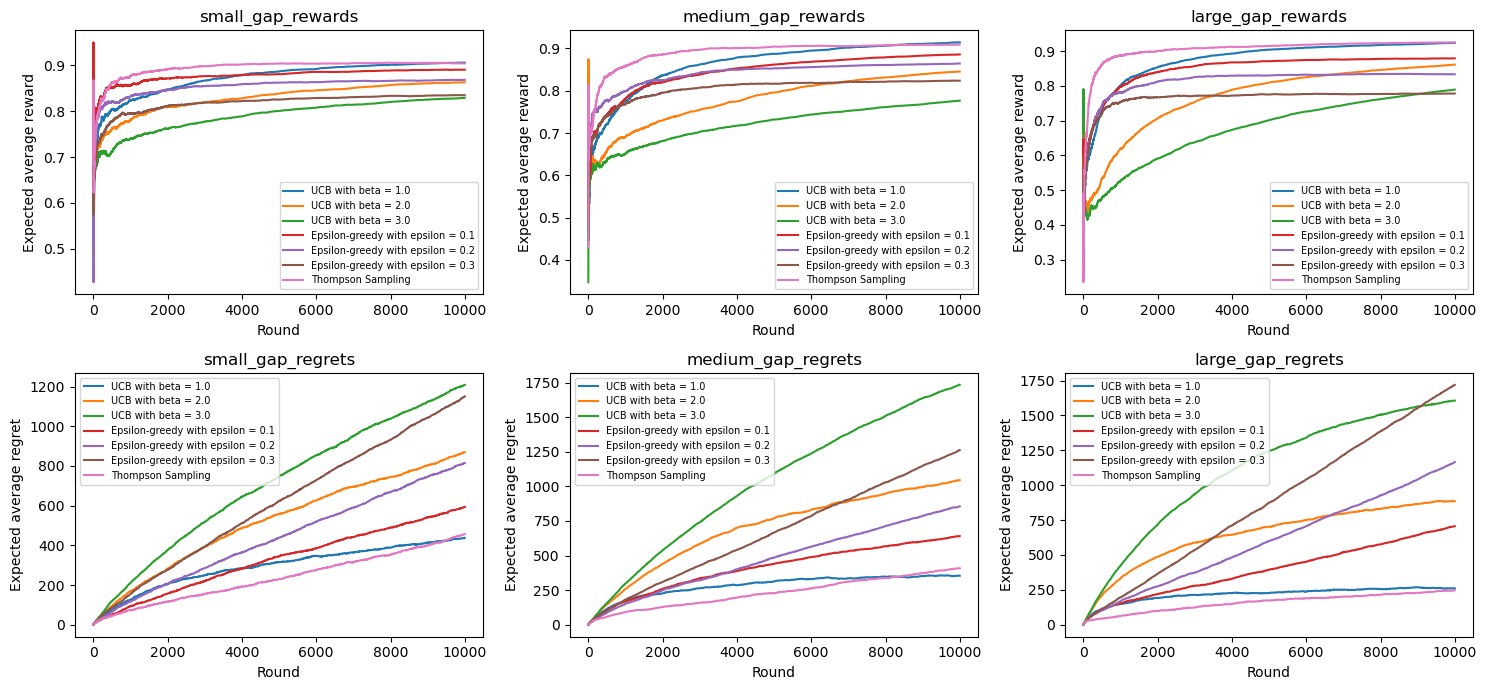

In [11]:
x_axis = [i for i in range(0, num_iters)]
fig=plt.figure(figsize=(15,7))

for i in range(len(mad_name)):
    fig1=plt.subplot(2,3,i+1)
    plt.xlabel("Round")
    plt.ylabel("Expected average reward")
    for name, rewards in rewards_env[mad_name[i]].items():
        plt.plot(x_axis, rewards,label=name)
    plt.legend(prop={"size":7})
    plt.title(mad_name[i]+'_'+'rewards')

for i in range(len(mad_name)):
    fig1=plt.subplot(2,3,i+4)
    plt.xlabel("Round")
    plt.ylabel("Expected average regret")
    for name, regrets in regrets_env[mad_name[i]].items():
        plt.plot(x_axis, regrets,label=name)
    plt.legend(prop={"size":7})
    plt.title(mad_name[i]+'_'+'regrets')

plt.tight_layout()

for i in range(len(mad_name)):
    for a in list(regrets_env[mad_name[i]].keys()):
        print(mad_name[i],"  ",a,"  regrets at t=10000  ",regrets_env[mad_name[i]][a][-1])


**Questions 2.** The sub-optimality gap $\Delta=Q(a^*)-\max_{a\neq a^*}Q(a)$ is an important feature of a bandit problem. Hence, our environment prove three sub-optimality gap: small gap, medium gap and large gap. Discuss your observations on the performance of three algorithms when facing different suboptimality gaps.

**Solution** For the epsilon-greedy, larger gap means that the algorithm can find the optimal arm earlier since the optimal arm has more chance to bring the highest reward. However, largar gap also leads to larger regret since the probability to exploration is the same among three conditions. For the UCB, largar gap helps the agent find the optimal arm ealier as mentioned above. However, the regret also decreases since the UCB algorithm always choose the estimated optimal arm. For the Thompson sampling, larger gap means faster convergence and less regret since it always choose the estimated optimal arm just like UCB. However, the UCB and Thompson sampling algorithm may fail to find the optimal arm because the lack of exploration.

**Questions 3.** What are the differences of perfermances among these three algorithms? Please briefly explain the respective advantages of each algorithm.

**Solution** Judging from the result, Thompson Sampling algorithm converges fast in the early rounds, thus bringing higher reward and less regret during the early stage. However, UCB algorithm gradually performs better than Thompson Sampling as the exploration-exploitation process continues. For the epsilon-greedy, the epsilon limits the higher bound of the expected average reward and force the total regret to linearly increase. But it can always find the optimal arm during the process as the exploration won't stop.


# Section 3. Value-iteration and Policy-iteration


In this part, we will implement value iteration and policy iteration algorithms in a Grid World environment.

You are required to finish  <u>*two*</u>   coding exercises and answer <u>*one*</u> question in the following notebook.

## Environment setting -- Grid World

Consider a known two-dimensional grid world environment. 

You will control an agent (the robot shown in the picture) in the environment to make it to the TERMINAL STATE. Each action has a probability of 20% to not behave as expected, as
specified in $getTransitionStatesAndProbs()$. When the agent enters the TERMINAL STATE, it must take the special ‘exit’ action to get the final reward. 

Your goal is to get the maximal rewards during each episode.

![](./pic.png)

More detail about the environment is in $setting.py$.


## In this part, we try to implement two algorithms：(A) value iteration algorithm and (B) policy iteration algorithm in the Grid World environment.


In [16]:
import util
from setting import*
import numpy as np
import matplotlib.pyplot as plt
class Agent:
    """
    An agent must define a getAction method, but may also define the
    following methods which will be called if they exist:

    def registerInitialState(self, state): # inspects the starting state
    """

    def __init__(self, index=0):
        self.index = index

    def getAction(self, state):
        util.utilraiseNotDefined()

### (A) Implement the value-iteration algorithm

Recall the value iteration state update equation:

$$V_{k+1}(s) \leftarrow \max_{a} \sum_{s'}P(s'|s,a)[R(s,a,s')+\gamma V_{k}(s')]$$

**Coding exercise.** Implement a value iteration agent in $ValueIterationAgent$. Your value iteration agent is an offline planner, not a reinforcement learning agent, so the relevant hyperparameter is the maximum number of iterations of value iteration it should run in its initial planning phase.

You are also required to enable early stopping for value iteration by checking whether the maximum change of values among the states is smaller than hyperparameter $ϵ$  in an iteration.

Implement the following methods for $ValueIterationAgent$.

• Method $runValueIteration$ computes the value function $self.values$ by running the value iteration algorithm.

• Method $computeActionfromvalues(state)$ computes the best action according to the valuefunction given by $self.values$.

• Method $computeQvalueFromvalues(state, action)$ returns the Q-value of the $(state, action)$ pair given by the value function self.values.

In [17]:


class ValueIterationAgent(Agent):
    """An agent that takes a Markov decision process on initialization
    and runs value iteration for a given number of iterations.

    Hint: Test your code with commands like `python main.py -a value -i 100 -k 10`.
    """
    def __init__(self, mdp, discount = 0.9, epsilon=0.001, iterations = 100):
        """
          Your value iteration agent should take an mdp on
          construction, run the indicated number of iterations
          and then act according to the resulting policy.

          Some useful mdp methods you will use:
              mdp.getStates()
              mdp.getPossibleActions(state)
              mdp.getTransitionStatesAndProbs(state, action)
              mdp.getReward(state, action, nextState)
              mdp.isTerminal(state)
        """
        self.mdp = mdp
        self.discount = discount
        self.epsilon = epsilon  # For examing the convergence of value iteration
        self.iterations = iterations # The value iteration will run AT MOST these steps
        self.values = util.Counter() # You need to keep the record of all state values here
        self.runValueIteration()

    def runValueIteration(self):
        """ YOUR CODE HERE """
        for _ in range(self.iterations):
            v_new = util.Counter()
            for s in self.mdp.getStates():
                if self.mdp.isTerminal(s):
                    v_new[s] = 0 # Special case: s is terminal
                else:
                    v_max = -1e9
                    for a in self.mdp.getPossibleActions(s):
                        v_max = max(v_max, self.computeQValueFromValues(s, a)) # Calculate V_{k+1}(s) using function computeQvalueFromValues
                    v_new[s] = v_max
            # Early stop
            delta = max(abs(v_new[s] - self.values[s]) for s in self.mdp.getStates())
            self.values = v_new
            if delta < self.epsilon:
                break
        """ END CODE HERE """
        return

    def getValue(self, state):
        """Return the value of the state (computed in __init__)."""
        return self.values[state]

    def computeQValueFromValues(self, state, action):
        """Compute the Q-value of action in state from the value function stored in self.values."""

        """ YOUR CODE HERE """
        value=0
        for nextState, prob in self.mdp.getTransitionStatesAndProbs(state, action):
            value += prob * (self.mdp.getReward(state, action, nextState) + self.discount * self.values[nextState]) # Calculate V_{k+1}(s)
        """ END CODE HERE """
        return value

    def computeActionFromValues(self, state):
        """The policy is the best action in the given state
        according to the values currently stored in self.values.

        You may break ties any way you see fit.  Note that if
        there are no legal actions, which is the case at the
        terminal state, you should return None.
        """
        """ YOUR CODE HERE """
        bestaction=None
        v_max = -1e9
        for a in self.mdp.getPossibleActions(state):
            v_a = self.computeQValueFromValues(state, a)
            if v_a > v_max: # check every action which would bring the largest reward
                v_max = v_a
                bestaction = a
        """ END CODE HERE """
        return bestaction

    def getPolicy(self, state):
        return self.computeActionFromValues(state)

    def getAction(self, state):
        return self.computeActionFromValues(state)

    def getQValue(self, state, action):
        return self.computeQValueFromValues(state, action)


### (B) Implement the policy iteration algorithm.

Let us recall the policy iteration algorithm as the first step. Given an MDP with a finite state space, action space, and reward function $R(s,a, s^{\prime})$. We first define the $V$-value function and $Q$-value function with reward function corresponding to state $s$, action $a$ and next state $s^{\prime}$. Specifically, the $V$-value of policy $\pi$ at state $s$ is defined as
 $$
     V^\pi(s)=\mathbb{E}\left[\sum_{t=0}^{\infty} \gamma^t R\left(s_t, a_t, s_t^{\prime}\right) \mid \pi, s_0=s\right]\,,
 $$
 and the $Q$-value of policy $\pi$ at state $s$ and action $a$ is defined as
 $$
     Q^\pi(s, a)=\mathbb{E}\left[\sum_{t=0}^{\infty} \gamma^t R\left(s_t, a_t, s_t^{\prime}\right) \mid \pi, s_0=s, a_0=a\right]\,.
 $$
Corresponding to the above $V$-value and $Q$-value function, recall that the policy iteration algorithm is equivalent to

• **Policy Evaluation:** For fixed current policy $\pi_i$,
    compute the $V$ values by iterating until values converge:
           $$
               V_{k+1}^{\pi_i}(s) \leftarrow \sum_{s^{\prime}} P\left(s, \pi_i(s), s^{\prime}\right)\left[R\left(s, \pi_i(s), s^{\prime}\right)+\gamma V_k^{\pi_i}\left(s^{\prime}\right)\right]\,,
           $$
           where $k$ denotes the iterating step when computing the values. 

• **Policy Improvement:** For fixed values, get a better policy using policy extraction:
           $$
                \pi_{i+1}(s)\in \arg \max _a \sum_{s^{\prime}} P\left(s, a, s^{\prime}\right)\left[R\left(s, a, s^{\prime}\right)+\gamma V^{\pi_i}\left(s^{\prime}\right)\right] 
           $$
           which is equivalent to $\pi_{i+1}(s)\in \arg \max _a Q^{\pi_i}(s,a)$.

**Coding exercise.** Implement a policy iteration agent in $PolicyIterationAgent$. 

Again, your policy iteration agent is an offline planner and the relevant hyperparameter is the maximum number of iterations of policy iteration, which is determined by hyperparameter iteration. Policy evaluation iterates until
values converge, which is also determined by hyperparameter $ϵ$.

If the policy does not change in the policy improvement phase, policy iteration stops early.


In [18]:
import random
class PolicyIterationAgent(Agent):
    """An agent that takes a Markov decision process on initialization
    and runs policy iteration for a given number of iterations..
    """

    def __init__(self, mdp, discount = 0.9, epsilon=0.001, iterations = 100):
        self.mdp = mdp
        self.discount = discount
        self.epsilon = epsilon  # For examing the convergence of policy iteration
        self.iterations = iterations # The policy iteration will run AT MOST these steps
        self.values = util.Counter() # You need to keep the record of all state values here
        self.policy = dict()
        self.runPolicyIteration()

    def runPolicyIteration(self):
        """ YOUR CODE HERE """
        # Initialization
        for s in self.mdp.getStates():
            self.policy[s] = None if self.mdp.isTerminal(s) else random.choice(self.mdp.getPossibleActions(s))
        # RunPolicyIteration
        for _ in range(self.iterations):
            # Policy Evaluation
            delta = 1e9 # Initialize delta
            while delta >= self.epsilon:
                # Similar to the value-iteration algorithm.
                v_new = util.Counter()
                for s in self.mdp.getStates():
                    v_new[s] = 0 if self.mdp.isTerminal(s) else self.computeQValueFromValues(s, self.policy[s]) # use policy[s] instead of the max
                delta = max(abs(v_new[s] - self.values[s]) for s in self.mdp.getStates())
                self.values = v_new
            # Policy Improvement
            p_new = dict()
            for s in self.mdp.getStates():
                if self.mdp.isTerminal(s):
                    p_new[s] = None
                else:
                    v_max, action = -1e9, None
                    for a in self.mdp.getPossibleActions(s):
                        v_a = self.computeQValueFromValues(s, a)
                        if v_a > v_max:
                            v_max = v_a
                            action = a # select action that brings the most reward
                    p_new[s] = action # update policy
            # Early stop check
            if self.policy == p_new:
                break
            self.policy = p_new
        """END"""
        return

    def getValue(self, state):
        """Return the value of the state (computed in __init__)."""
        return self.values[state]

    def computeQValueFromValues(self, state, action):
        """Compute the Q-value of action in state from the value function stored in self.values."""

        """ YOUR CODE HERE """
        # the same as before
        value=0
        for nextState, prob in self.mdp.getTransitionStatesAndProbs(state, action):
            value += prob * (self.mdp.getReward(state, action, nextState) + self.discount * self.values[nextState]) # Calculate V_{k+1}(s)
        """END"""
        return value

    def computeActionFromValues(self, state):
        """The policy is the best action in the given state
          according to the values currently stored in self.values.

          You may break ties any way you see fit.  Note that if
          there are no legal actions, which is the case at the
          terminal state, you should return None.
        """

        """ YOUR CODE HERE """
        # the same as before
        bestaction=None
        v_max = -1e9
        for a in self.mdp.getPossibleActions(state):
            v_a = self.computeQValueFromValues(state, a)
            if v_a > v_max: # check every action which would bring the largest reward
                v_max = v_a
                bestaction = a
        """END"""
        return bestaction

    def getPolicy(self, state):
        return self.policy[state]

    def getAction(self, state):
        return self.policy[state]

    def getQValue(self, state, action):
        return self.computeQValueFromValues(state, action)

## Running two algorithms in the GRID-WORLD environment and  Visualization

Here, we try to run two algorithms in our environment. You should run the following code without editing and answer **Questions 4** based on the output. **Your output will be one of the criteria we use to score**.


You also can change the hyperparameters privately to get a better understanding of these two algorithms. 




RUNNING 50 EPISODES
AGENT policy
ITERS : 1  ,AVERAGE SUM OF REWARDS FROM START STATE: 0.2547654219589723




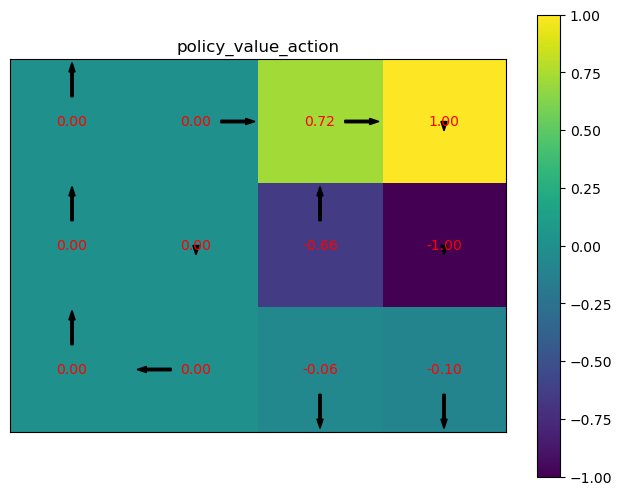


RUNNING 50 EPISODES
AGENT value
ITERS : 1  ,AVERAGE SUM OF REWARDS FROM START STATE: 0.12694151434029388




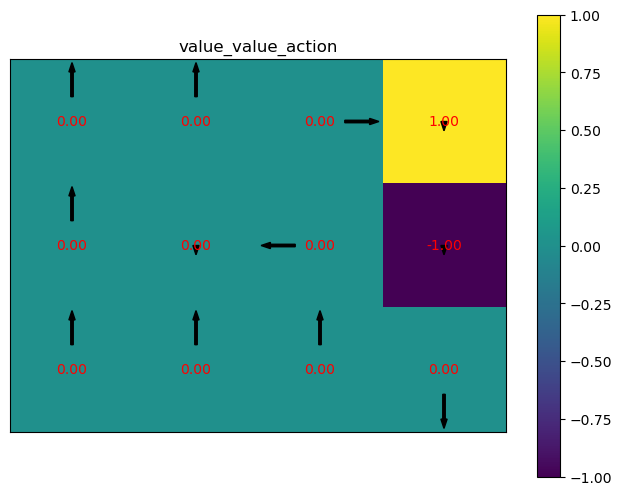


RUNNING 50 EPISODES
AGENT policy
ITERS : 2  ,AVERAGE SUM OF REWARDS FROM START STATE: 0.2374144574950918




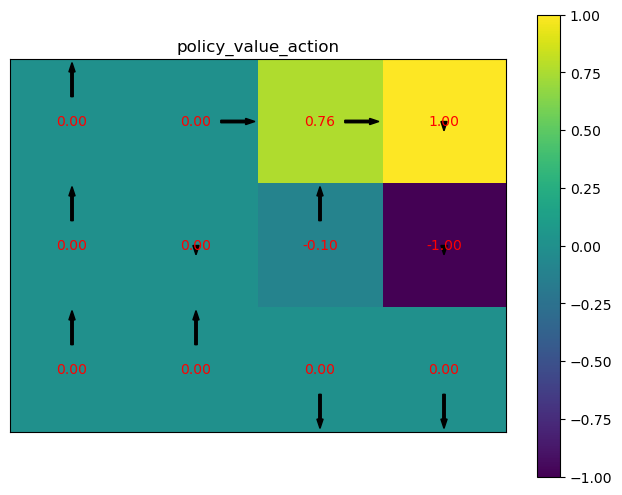


RUNNING 50 EPISODES
AGENT value
ITERS : 2  ,AVERAGE SUM OF REWARDS FROM START STATE: 0.24813723958903044




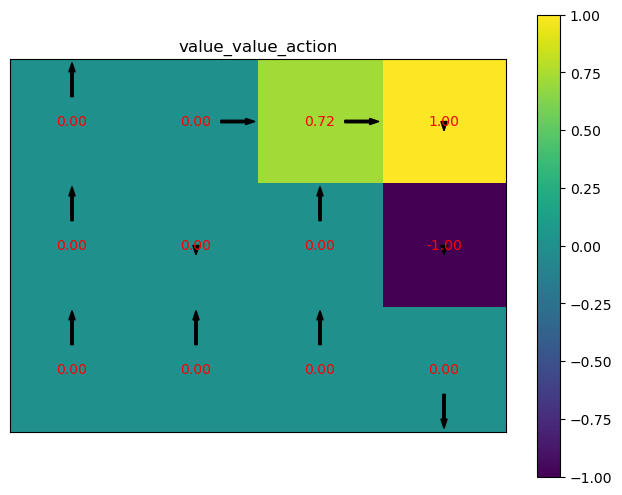


RUNNING 50 EPISODES
AGENT policy
ITERS : 3  ,AVERAGE SUM OF REWARDS FROM START STATE: 0.5173013194333131




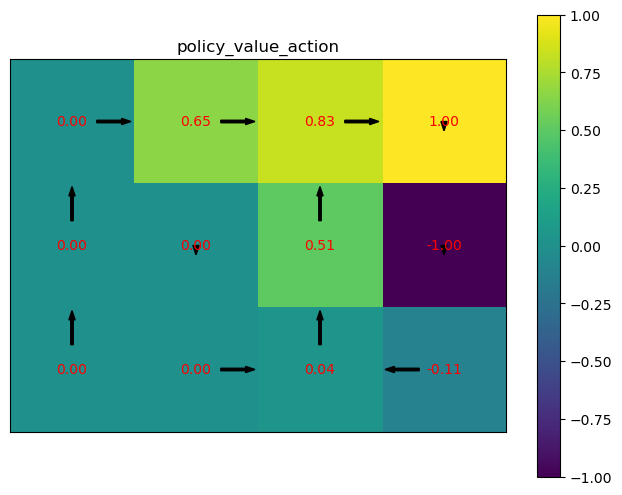


RUNNING 50 EPISODES
AGENT value
ITERS : 3  ,AVERAGE SUM OF REWARDS FROM START STATE: 0.44324973932655914




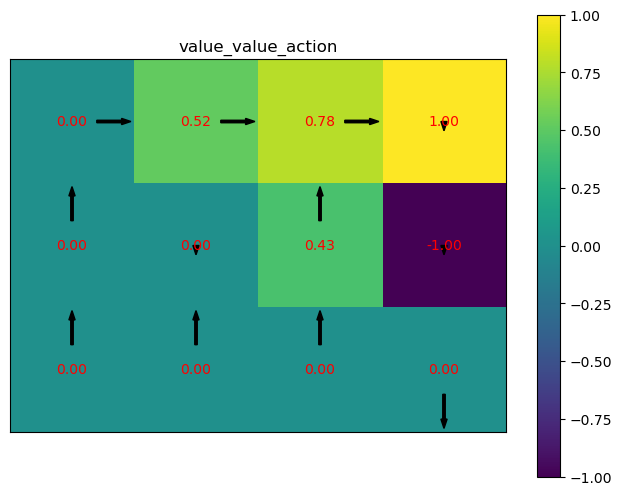


RUNNING 50 EPISODES
AGENT policy
ITERS : 4  ,AVERAGE SUM OF REWARDS FROM START STATE: 0.529290180801893




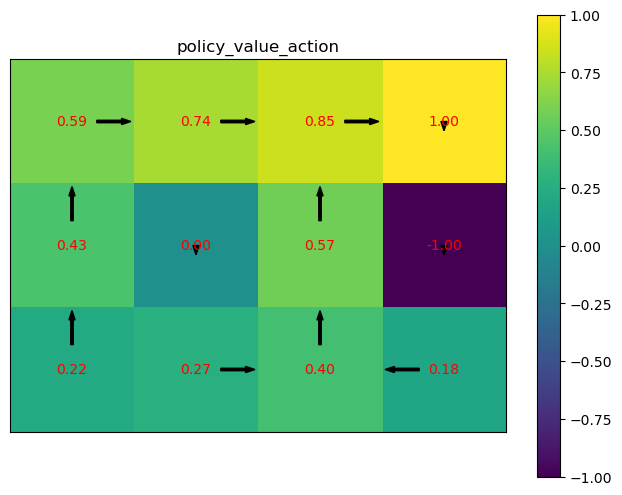


RUNNING 50 EPISODES
AGENT value
ITERS : 4  ,AVERAGE SUM OF REWARDS FROM START STATE: 0.5164755033420001




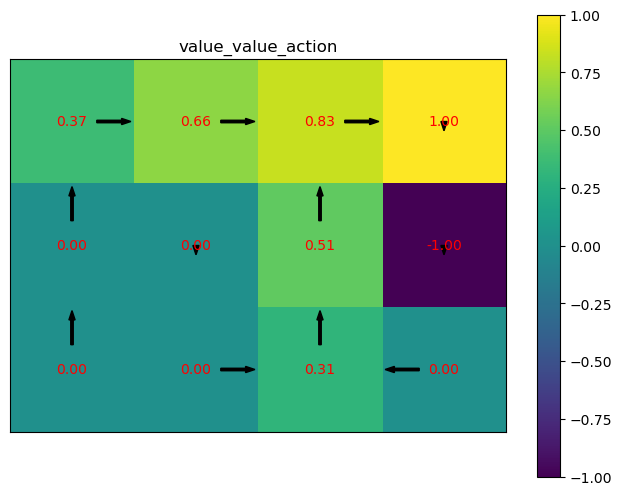

In [19]:
#####hyperparameters#########
np.random.seed(0)
grid="BookGrid"            #type of environment,"BridgeGrid"#"BookGrid"
epsilon=0.3      
agents=["policy","value"]  #optional policy ,value
iters_list=[1,2,3,4]       # num of iterations
discount=0.9
episodes=50

###############################




def runEpisode(agent, environment, discount, decision, message, pause, episode):
    returns = 0
    totalDiscount = 1.0
    environment.reset()
    if 'startEpisode' in dir(agent): agent.startEpisode()
    message("BEGINNING EPISODE: "+str(episode)+"\n")
    while True:

        # DISPLAY CURRENT STATE
        state = environment.getCurrentState()
        # display(state)
        pause()

        # END IF IN A TERMINAL STATE
        actions = environment.getPossibleActions(state)
        if len(actions) == 0:
            message("EPISODE "+str(episode)+" COMPLETE: RETURN WAS "+str(returns)+"\n")
            return returns

        # GET ACTION (USUALLY FROM AGENT)
        action = decision(state)
        if action == None:
            raise 'Error: Agent returned None action'

        # EXECUTE ACTION
        nextState, reward = environment.doAction(action)
        message("Started in state: "+str(state)+
                "\nTook action: "+str(action)+
                "\nEnded in state: "+str(nextState)+
                "\nGot reward: "+str(reward)+"\n")
        # UPDATE LEARNER
        if 'observeTransition' in dir(agent):
            agent.observeTransition(state, action, nextState, reward)

        returns += reward * totalDiscount
        totalDiscount *= discount

    if 'stopEpisode' in dir(agent):
        agent.stopEpisode()



# opts = parseOptions()

###########################
# GET THE GRIDWORLD
###########################

mdpFunction = eval("get"+grid)
mdp = mdpFunction()
env = GridworldEnvironment(mdp)

###########################
# GET THE DISPLAY ADAPTER
###########################


def get_values_actions(a,num):
    width=0
    heigh=0
    for i in range(len(list(a.values.keys()))):
        if(len(list(a.values.keys())[i])==2):
            if(width<list(a.values.keys())[i][0]+1):
                width=list(a.values.keys())[i][0]+1
            if(heigh<list(a.values.keys())[i][1]+1):
                heigh=list(a.values.keys())[i][1]+1
    # width=list(a.values.keys())[-1][0]+1
    # heigh=list(a.values.keys())[-1][1]+1
    vi=np.zeros((heigh,width))
    action_x=np.zeros((heigh,width))
    action_y=np.zeros((heigh,width))
    # print(heigh,width)
    for i in range(width):
        for j in range(heigh):
            
            vi[heigh-1-j][i]=a.values[(i,j)]
            if((i,j) not in a.policy ):
                continue
            if(a.policy[(i,j)]=="east"):
                action_x[heigh-1-j][i]=num
                action_y[heigh-1-j][i]=0
            elif(a.policy[(i,j)]=="south"):
                action_x[heigh-1-j][i]=0
                action_y[heigh-1-j][i]=num
            elif(a.policy[(i,j)]=="west"):
                action_x[heigh-1-j][i]=-num
                action_y[heigh-1-j][i]=0   
            elif(a.policy[(i,j)]=="north"):
                action_x[heigh-1-j][i]=0
                action_y[heigh-1-j][i]=-num
    return vi,action_x,action_y

def plot_(value_mat,action_x,action_y,agent_type,env_name):
    if(env_name=="BookGrid"):
        vmin=-1
        vmax=1
    elif(env_name=="BridgeGrid"):
        vmin=-100
        vmax=10
    matrix = value_mat

    plt.figure(figsize=(value_mat.shape[1]*2,value_mat.shape[0]*2))
    plt.imshow(matrix, cmap='viridis', interpolation='nearest',vmin=vmin, vmax=vmax)

    for i in range(value_mat.shape[0]):
        for j in range(value_mat.shape[1]):
            plt.text(j , i , '{:.2f}'.format(matrix[i, j]), ha='center', va='center', color='red')
            plt.arrow(j+action_x[i][j] , i+action_y[i][j] , action_x[i][j], action_y[i][j], color='black', width=0.02, head_width=0.05)
    plt.title(agent_type+"_value_action")
    plt.xticks([])
    plt.yticks([])
    plt.colorbar()
    plt.show()


###########################
# RUN EPISODES
###########################

messageCallback = lambda x: printString(x)
messageCallback= lambda x : None 
# FIGURE OUT WHETHER TO WAIT FOR A KEY PRESS AFTER EACH TIME STEP
pauseCallback = lambda : None
# RUN EPISODES


sum_of_rewards_value=[]
sum_of_rewards_policy=[]

for iters in iters_list:
    for agent in agents:
        a = None
        if agent == 'value':
            a = ValueIterationAgent(mdp, discount, epsilon, iters)

        elif agent == 'policy':
            a = PolicyIterationAgent(mdp, discount, epsilon,iters)
        else:
            raise Exception('Unknown agent type: '+agent)
        
        decisionCallback = a.getAction

        if episodes > 0:
            print()
            print("RUNNING", episodes, "EPISODES")
            print("AGENT",agent)
        returns = 0
        for episode in range(1, episodes+1):
            returns+= runEpisode(a, env, discount, decisionCallback, messageCallback, pauseCallback, episode)
        if episodes > 0:
            # print()
            print("ITERS : "+str(iters)+"  ,AVERAGE SUM OF REWARDS FROM START STATE: "+str((returns+0.0) / episodes))
            print()
            print()
        if(agent=="value"):
            sum_of_rewards_value.append((returns+0.0) / episodes)
            a.policy={}
            for key in list(a.values.keys()):
                a.policy[key]=a.getPolicy(key)
        else:
            sum_of_rewards_policy.append((returns+0.0) / episodes)
        
        # if(iters==iters_list[-1]):
        value_mat,action_x,action_y=get_values_actions(a,0.2)
        plot_(value_mat,action_x,action_y,agent,grid)


**Questions 4.**

Observe the pictures of all states against the number of iterations for both $ValueIterationAgent$ and $PolicyIterationAgent$. 

Which algorithm converges faster?   (Which algorithm converges to optimal policy faster?) 

Explain your conclusion.

**Solution**

Notice that in the 3rd iteration, the policy-iteration algorithm converges to the optimal policy while the value-iteration algorithm still struggles to find the optimal policy, which means that policy-iteration algorithm converges faster than value-iteration algorithm. However, it doesn't mean that the policy-iteration algorithm beats value-iteration algorithm in all situation. In an environment where state and action spaces are small, policy-iteraiton algorithm always converge fast. While in an environment where state and action spaces are large, value-iteration algorithm is preferred since it saves lots of computation for value calculation in each iteration.